# Цель работы

Ознакомиться с методами одномерного поиска, используемыми в многмерных методах минимизации функции n переменных. Сравнить различные алгоритмы по эффективности на тестовых примерах.

# Задание

* Реализовать методы дихотомии, золотого сечения, исследовать их сходимость и провести сравнение по числу вычислений функций для достижения заданной точности $\epsilon$ от $10^{-1}$ до $10^{-7}$. Построить график количества вычислений минимизируемой функции от десятичного логарифма задаваемой точности $\epsilon$.
* Реализовать алгоритм поиска интервала, содержащего минимум функций.
* Реализовать метод Фибоначчи, сравнить его с методами дихотомии и золотого сечения.

# Таблицы с результатами исследований по каждому методу

### Метод дихотомии

In [103]:
DichotomyMethod(False)

X_min = 7.0000000e+00
Functions called: 58


,x1,x2,f(x1),f(x2),ai,bi,li,l(i-1) / li
1,8.99999997e+00,9.00000003e+00,3.99999990e+00,4.00000010e+00,-2.00000000e+00,2.00000000e+01,2.20000000e+01,nan
2,3.49999999e+00,3.50000004e+00,1.22500001e+01,1.22499997e+01,-2.00000000e+00,9.00000003e+00,1.10000000e+01,2.00000000e+00
3,6.24999998e+00,6.25000003e+00,5.62500028e-01,5.62499953e-01,3.49999999e+00,9.00000003e+00,5.50000004e+00,1.99999999e+00
4,7.62499998e+00,7.62500003e+00,3.90624973e-01,3.90625035e-01,6.24999998e+00,9.00000003e+00,2.75000004e+00,1.99999998e+00
5,6.93749998e+00,6.93750003e+00,3.90625254e-03,3.90624629e-03,6.24999998e+00,7.62500003e+00,1.37500005e+00,1.99999996e+00
6,7.28124998e+00,7.28125003e+00,7.91015506e-02,7.91015788e-02,6.93749998e+00,7.62500003e+00,6.87500048e-01,1.99999993e+00
7,7.10937498e+00,7.10937503e+00,1.19628861e-02,1.19628970e-02,6.93749998e+00,7.28125003e+00,3.43750049e-01,1.99999985e+00
8,7.02343748e+00,7.02343753e+00,5.49315445e-04,5.49317789e-04,6.93749998e+00,7.10937503e+00,1.71875050e-01,1.99999971e+00
9,6.98046873e+00,6.98046878e+00,3.81470524e-04,3.81468571e-04,6.93749998e+00,7.02343753e+00,8.59375498e-02,1.99999942e+00
10,7.00195310e+00,7.00195315e+00,3.81461735e-06,3.81481266e-06,6.98046873e+00,7.02343753e+00,4.29687999e-02,1.99999884e+00


### Метод золотого сечения

In [94]:
GoldenRatioMethod(False)

X_min = 7.0000000e+00
Functions called: 42


,x1,x2,f(x1),f(x2),ai,bi,li,l(i-1) / li
1,6.40325225e+00,1.15967478e+01,3.56107880e-01,2.11300899e+01,-2.00000000e+00,2.00000000e+01,2.20000000e+01,nan
2,3.19349550e+00,6.40325225e+00,1.44894765e+01,3.56107880e-01,-2.00000000e+00,1.15967478e+01,1.35967478e+01,1.61803399e+00
3,6.40325225e+00,8.38699101e+00,3.56107880e-01,1.92374406e+00,3.19349550e+00,1.15967478e+01,8.40325225e+00,1.61803399e+00
4,5.17723427e+00,6.40325225e+00,3.32247492e+00,3.56107880e-01,3.19349550e+00,8.38699101e+00,5.19349550e+00,1.61803399e+00
5,6.40325225e+00,7.16097303e+00,3.56107880e-01,2.59123164e-02,5.17723427e+00,8.38699101e+00,3.20975674e+00,1.61803399e+00
6,7.16097303e+00,7.62927023e+00,2.59123164e-02,3.95981019e-01,6.40325225e+00,8.38699101e+00,1.98373876e+00,1.61803399e+00
7,6.87154945e+00,7.16097303e+00,1.64995451e-02,2.59123164e-02,6.40325225e+00,7.62927023e+00,1.22601798e+00,1.61803399e+00
8,6.69267583e+00,6.87154945e+00,9.44481440e-02,1.64995451e-02,6.40325225e+00,7.16097303e+00,7.57720782e-01,1.61803399e+00
9,6.87154945e+00,6.98209942e+00,1.64995451e-02,3.20430859e-04,6.69267583e+00,7.16097303e+00,4.68297198e-01,1.61803399e+00
10,6.98209942e+00,7.05042306e+00,3.20430859e-04,2.54248475e-03,6.87154945e+00,7.16097303e+00,2.89423585e-01,1.61803399e+00


### Метод Фибоначчи

In [101]:
FibonachiMethod(False)

X_min = 6.9999999e+00
Functions called: 42


,x1,x2,f(x1),f(x2),ai,bi,li,l(i-1) / li
1,6.40325225e+00,1.15967478e+01,3.56107880e-01,2.11300899e+01,-2.00000000e+00,2.00000000e+01,2.20000000e+01,nan
2,6.40325225e+00,6.40325225e+00,3.56107880e-01,3.56107880e-01,-2.00000000e+00,1.15967478e+01,1.35967478e+01,1.61803399e+00
3,3.19349550e+00,6.40325225e+00,1.44894765e+01,3.56107880e-01,-2.00000000e+00,6.40325225e+00,8.40325225e+00,1.61803399e+00
4,6.40325225e+00,8.38699101e+00,3.56107880e-01,1.92374406e+00,3.19349550e+00,6.40325225e+00,3.20975674e+00,2.61803399e+00
5,5.17723427e+00,6.40325225e+00,3.32247492e+00,3.56107880e-01,3.19349550e+00,8.38699101e+00,5.19349550e+00,6.18033989e-01
6,6.40325225e+00,7.16097303e+00,3.56107880e-01,2.59123164e-02,5.17723427e+00,8.38699101e+00,3.20975674e+00,1.61803399e+00
7,7.16097303e+00,7.62927023e+00,2.59123164e-02,3.95981019e-01,6.40325225e+00,8.38699101e+00,1.98373876e+00,1.61803399e+00
8,6.87154945e+00,7.16097303e+00,1.64995451e-02,2.59123164e-02,6.40325225e+00,7.62927023e+00,1.22601798e+00,1.61803399e+00
9,6.69267583e+00,6.87154945e+00,9.44481440e-02,1.64995451e-02,6.40325225e+00,7.16097303e+00,7.57720782e-01,1.61803399e+00
10,6.87154945e+00,6.98209942e+00,1.64995451e-02,3.20430859e-04,6.69267583e+00,7.16097303e+00,4.68297198e-01,1.61803399e+00


# График зависимости *количества вычислений* целевой функции от логарифма задаваемой точности $\epsilon$

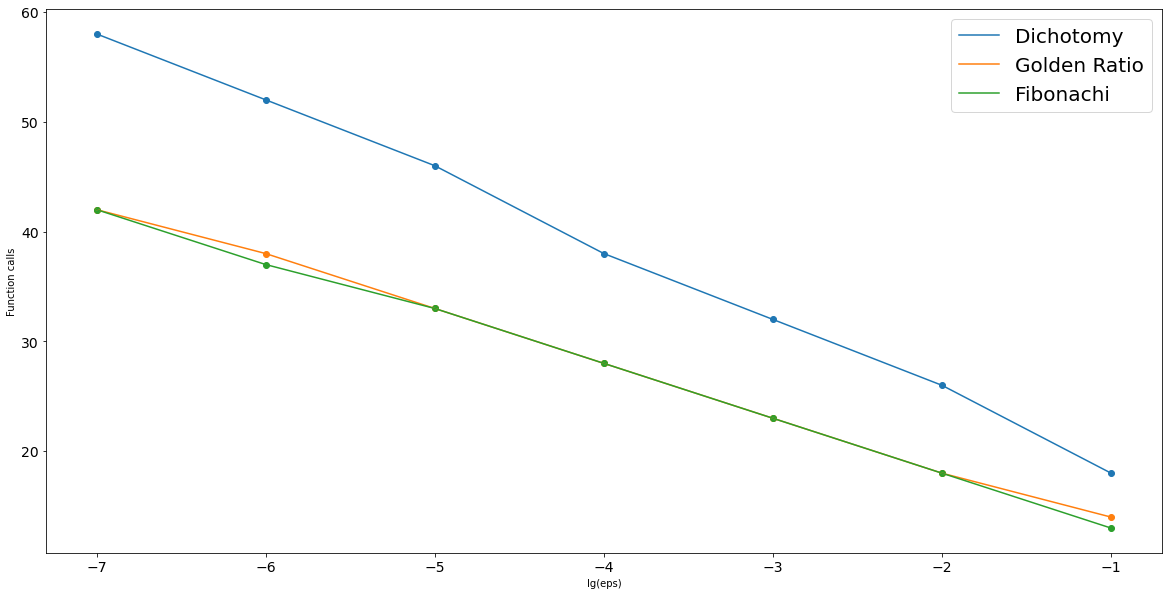

In [89]:
Graph()

# Таблица, показывающая процесс поиска интервала, содержащего минимум

In [68]:
FindMinimum()

[1.1000000; 10.7000000]


,x,f(x)
1,-2.0,81.00
2,-1.9,79.21
3,-1.7,75.69
4,-1.3,68.89
5,-0.5,56.25
6,1.1,34.81
7,4.3,7.29
8,10.7,13.69


# Приложение

In [82]:
import pandas as pd
import numpy as np
import math
from IPython.display import display
import matplotlib.pyplot as plt

In [48]:
K1 = 0.3819660112501051
K2 = 0.6180339887498949

In [49]:
f = lambda x: (x - 7) ** 2

In [50]:
def FormBine(n) -> int:
    return (int((0.5 * (1 + math.sqrt(5))) ** n / math.sqrt(5)) if n >= 40 else
    int(((0.5 * (1 + math.sqrt(5))) ** n - (0.5 * (1 - math.sqrt(5))) ** n) / math.sqrt(5)))

In [51]:
def FindFib(value):
    counter = 0
    a = 1
    b = 1
    c = a + b
    while (c < value):
        v = c
        a = b
        b = v
        c = b + a
        counter += 1
    return counter

In [102]:
def DichotomyMethod(isReturn, eps = 1e-7, a0 = -2.0, b0 = 20.0):
    fCount = 0
    a, b, x1, x2 = [], [], [], []
    a.append(a0)
    b.append(b0)
    x1.append((a0 + b0 - eps / 2) / 2)
    x2.append((a0 + b0 + eps / 2) / 2)
    n = 1
    while abs(b[-1] - a[-1]) > eps:
        if f(x1[-1]) <= f(x2[-1]):
            a.append(a[-1])
            b.append(x2[-1])
        else:
            a.append(x1[-1])
            b.append(b[-1])
        x1.append((a[-1] + b[-1] - eps / 2) / 2)
        x2.append((a[-1] + b[-1] + eps / 2) / 2)
        fCount += 2
        n += 1
    if isReturn:
        return fCount
    print ("X_min = {:.7e}".format(0.5 * (x1[-1] + x2[-1])))
    print ("Functions called:", fCount)
    arr = []
    arr.append(np.NaN)
    for i in range(1, n):
        arr.append((b[i - 1] - a[i - 1]) / (b[i] - a[i]))
    df = pd.DataFrame({'x1' : x1,
                       'x2' : x2,
                       'f(x1)' : [f(xi) for xi in x1], 
                       'f(x2)' : [f(xi) for xi in x2],
                       'ai' : a,
                       'bi' : b,
                       'li' : [b[i] - a[i] for i in range(n)], 
                       'l(i-1) / li ' : arr},
                        index = range(1, n + 1))
    display(df.style.format('{:.8e}').highlight_min(subset='li', color = '#ACDDDE'))

In [93]:
def GoldenRatioMethod(isReturn, eps = 1e-7, a0 = -2.0, b0 = 20.0):
    x1, x2, fx1, fx2, a, b = [], [], [], [], [], []
    fCount = 0
    n = 0
    a.append(a0)
    b.append(b0)
    x1.append(a0 + K1 * (b0 - a0))
    x2.append(a0 + K2 * (b0 - a0))
    fx1.append(f(x1[0]))
    fx2.append(f(x2[0]))
    fCount += 2
    while True:
        n += 1
        if fx1[-1] <= fx2[-1]:
            a.append(a[-1])
            b.append(x2[-1])
            x2.append(x1[-1])
            x1.append(a[-1] + K1 * (b[-1] - a[-1]))
            fx2.append(fx1[-1])
            fx1.append(f(x1[-1]))
        else:
            a.append(x1[-1])
            b.append(b[-1])
            x1.append(x2[-1])
            x2.append(a[-1] + K2 * (b[-1] - a[-1]))
            fx1.append(fx2[-1])
            fx2.append(f(x2[-1]))
        fCount += 1
        if abs(b[-1] - a[-1]) <= eps:
            break
    if isReturn:
        return fCount
    print ("X_min = {:.7e}".format(0.5 * (x1[-1] + x2[-1])))
    print ("Functions called:", fCount)
    arr = []
    arr.append(np.NaN)
    for i in range(1, n + 1):
        arr.append((b[i - 1] - a[i - 1]) / (b[i] - a[i]))
    df = pd.DataFrame({'x1' : x1,
                       'x2' : x2,
                       'f(x1)' : [f(xi) for xi in x1], 
                       'f(x2)' : [f(xi) for xi in x2],
                       'ai' : a,
                       'bi' : b,
                       'li' : [b[i] - a[i] for i in range(n + 1)], 
                       'l(i-1) / li ' : arr},
                        index = range(1, n + 2))
                        
    display(df.style.format('{:.8e}').highlight_min(subset='li', color = '#ACDDDE'))

In [100]:
def FibonachiMethod(isReturn, eps = 1e-7, a0 = -2.0, b0 = 20.0):
    a, b, x1, x2, fx1, fx2 = [], [], [], [], [], []
    fCount = 0
    delt = b0 - a0
    n2 = FindFib(delt / eps)
    Fn2 = FormBine(n2)
    n = 0
    a.append(a0)
    b.append(b0)
    x1.append(a[0] + (b[0] - a[0]) * FormBine(n2 - 2) / Fn2)
    x2.append(a[0] + b[0] - x1[0])
    fx1.append(f(x1[0]))
    fx2.append(f(x2[0]))
    fCount += 2
    while True:
        n += 1
        if fx1[-1] <= fx2[-1]:
            a.append(a[-1])
            b.append(x2[-1])
            x2.append(x1[-1])
            x1.append(a[-1] + delt * FormBine(n2 - n - 1) / Fn2)
            fx2.append(fx1[-1])
            fx1.append(f(x1[-1]))
        else:
            a.append(x1[-1])
            b.append(b[-1])
            x1.append(x2[-1])
            x2.append(a[-1] + delt * FormBine(n2 - n) / Fn2)
            fx1.append(fx2[-1])
            fx2.append(f(x2[-1]))
        fCount += 1
        if abs(b[-1] - a[-1]) <= eps:
            break
    if isReturn:
        return fCount
    print ("X_min = {:.7e}".format(0.5 * (x1[-1] + x2[-1])))
    print ("Functions called:", fCount)
    arr = []
    arr.append(np.NaN)
    for i in range(1, n):
        arr.append((b[i - 1] - a[i - 1]) / (b[i] - a[i]))
    arr.append(np.NaN)
    df = pd.DataFrame({'x1' : x1,
                       'x2' : x2,
                       'f(x1)' : [f(xi) for xi in x1], 
                       'f(x2)' : [f(xi) for xi in x2],
                       'ai' : a,
                       'bi' : b,
                       'li' : [b[i] - a[i] for i in range(n + 1)],
                       'l(i-1) / li ' : arr},
                        index = range(1, n + 2))
    display(df.style.format('{:.8e}').highlight_min(subset='li', color = '#ACDDDE'))

In [66]:
def FindMinimum(a0 = -2.0):
    x = []
    x.append(a0)
    h = 0
    delt = 1e-1
    if f(x[0]) > f(x[0] + delt):
        x.append(x[0] + delt)
        h = delt
    elif f(x[0]) < f(x[0] + delt):
        x.append(x[0] - delt)
        h = -delt
    else:
        print ("Equal values ar f(x) and f(x + delt)")
        exit
    
    k = 1
    while True:
        h *= 2
        x.append(x[-1] + h)
        if f(x[-2]) > f(x[-1]):
            k += 1
        else:
            print ("[{:.7f}; {:.7f}]".format(x[-3], x[-1]))
            break
    df = pd.DataFrame({'x' : x,
                       'f(x)' : [f(xi) for xi in x]}
                      , index = range(1, k + 3))
    display(df)

In [88]:
def Graph():
    nDich, nGold, nFibn = [], [], []
    currEps = 1e-1
    while currEps >= 1e-7:
        nDich.append(DichotomyMethod(True, currEps))
        nGold.append(GoldenRatioMethod(True, currEps))
        nFibn.append(FibonachiMethod(True, currEps))
        currEps /= 10.
    fig, ax = plt.subplots(figsize=(20,10))
    X = np.arange(-1, -8, -1)
    ax.plot(X, nDich, label = 'Dichotomy')
    ax.plot(X, nGold, label = 'Golden Ratio')
    ax.plot(X, nFibn, label = 'Fibonachi')
    ax.scatter(X, nDich)
    ax.scatter(X, nGold)
    ax.scatter(X, nFibn)
    ax.legend(fontsize = 20)
    ax.set_ylabel('Function calls')
    ax.set_xlabel('lg(eps)')
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()